# Boston Housing Dataset

A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston. Dataset has 506 instances and 13 features. The main task is prediction of median value of the house (in $1,000's).

### Import libraries, models and dataset itself.

*   Import numpy to work with arrays
*   Import pandas to work with DataFrames in a neat tables
*   Import boston dataset from sklearn 
*   Import three models - Linear Regression, Logistic Regression and Support Vector Machines

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

### Load and expore dataset

Load boston dataset to boston_dataset variable. 

In [0]:
boston_dataset = load_boston()

As sklearn datasets stored as Bunch objects (similar in idea to dictionary structure), we can access parts of dataset by using keys() method. Dataset is separated into:
*   "data" - 506 unlabeled rows, each one corresponds to single house;
*   "target" - median values of house in $1,000's;
*   "feature_names" -  actual labels for 13 columns in "data";
*  "DESCR" - detailed description of the dataset;



In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Looking at the feature names it's hard to understand which one means what, let's load "DESCR" key from boston_dataset.

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Detailed description of the dataset as below:

In [28]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Let's create a pandas DataFrame, passing "columns=boston_dataset.feature_names" will add labels for our columns. Also let's create new column "PRICE" and add data into it from "target" key of boston_dataset Bunch object. Display first 5 rows of the new DataFrame.

In [29]:
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
df["PRICE"] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


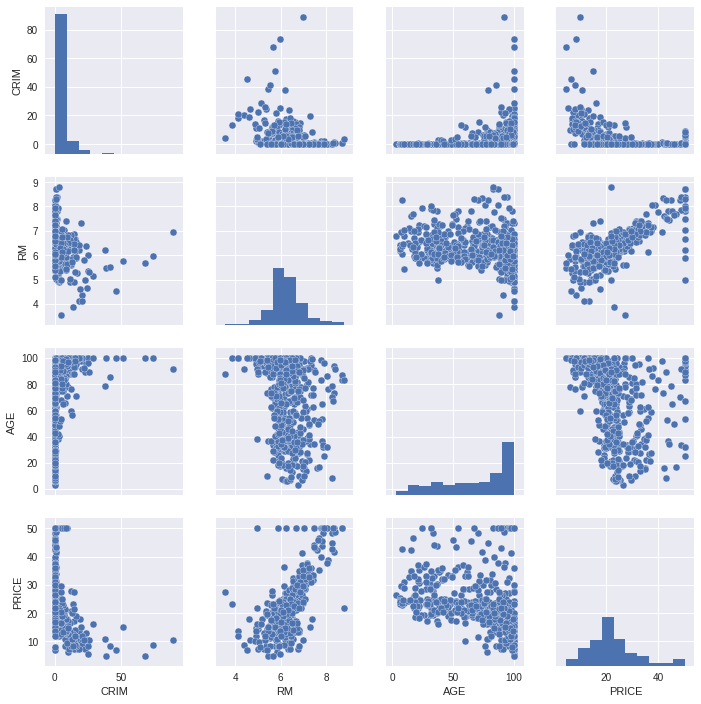

In [31]:
import seaborn as sns
sns.pairplot(df, x_vars=["CRIM","RM","AGE","PRICE"], y_vars=["CRIM","RM","AGE","PRICE"])

### Split dataset

Split dataset into training and test sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset.data, boston_dataset.target, random_state=0)

In [0]:
lr = LinearRegression().fit(X_train,y_train)

Below is the slope coefficient, using trailing underscore (coef_) to distinguish between user defined variables and derived from training data. Stored as an array, depending on how many features are in the dataset.

In [8]:
lr.coef_

array([-1.16869578e-01,  4.39939421e-02, -5.34808462e-03,  2.39455391e+00,
       -1.56298371e+01,  3.76145473e+00, -6.95007160e-03, -1.43520477e+00,
        2.39755946e-01, -1.12937318e-02, -9.86626289e-01,  8.55687565e-03,
       -5.00029440e-01])

Below is the offset coefficient, only one value stored in the intersect_ attribute.

In [9]:
lr.intercept_

36.980455337620576

In [10]:
print("Training score: {}".format(lr.score(X_train,y_train)))

Training score: 0.769744837056394


In [11]:
print("Test score: {}".format(lr.score(X_test,y_test)))

Test score: 0.6353620786674614


In [0]:
from sklearn.linear_model import Lasso

In [0]:
ls= Lasso().fit(X_train,y_train)

In [14]:
ls.score(X_train,y_train)

0.7150561596565886

In [15]:
ls.score(X_test,y_test)

0.5515110936187517

In [16]:
np.sum(ls.coef_ != 0)

11